# Import the Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
import joblib

# Load the Dataset

In [3]:
df = pd.read_excel('Rice_Cammeo_Osmancik.xlsx')

# Exploratory Data Analysis

In [4]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [5]:
df.shape

(3810, 8)

In [6]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [8]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


# Data Cleaning

In [9]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

# Separate the Input & Output Data

In [10]:
# input data
x = df.drop('Class', axis = 1)

# output data
y = df['Class']

In [11]:
x.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Eccentricity         float64
Convex_Area            int64
Extent               float64
dtype: object

In [12]:
np.unique(y)

array(['Cammeo', 'Osmancik'], dtype=object)

In [13]:
y.value_counts()

Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

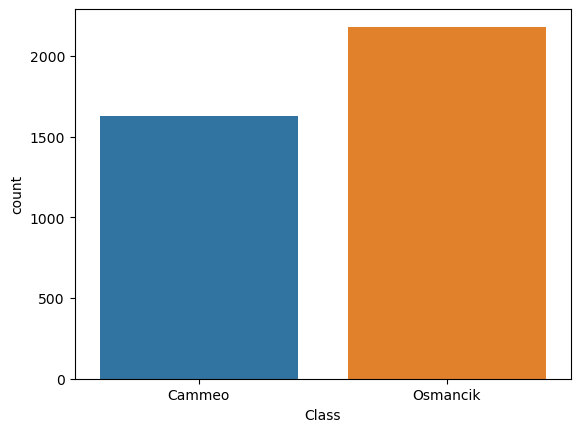

In [14]:
sns.countplot(x = y);

# Visualization

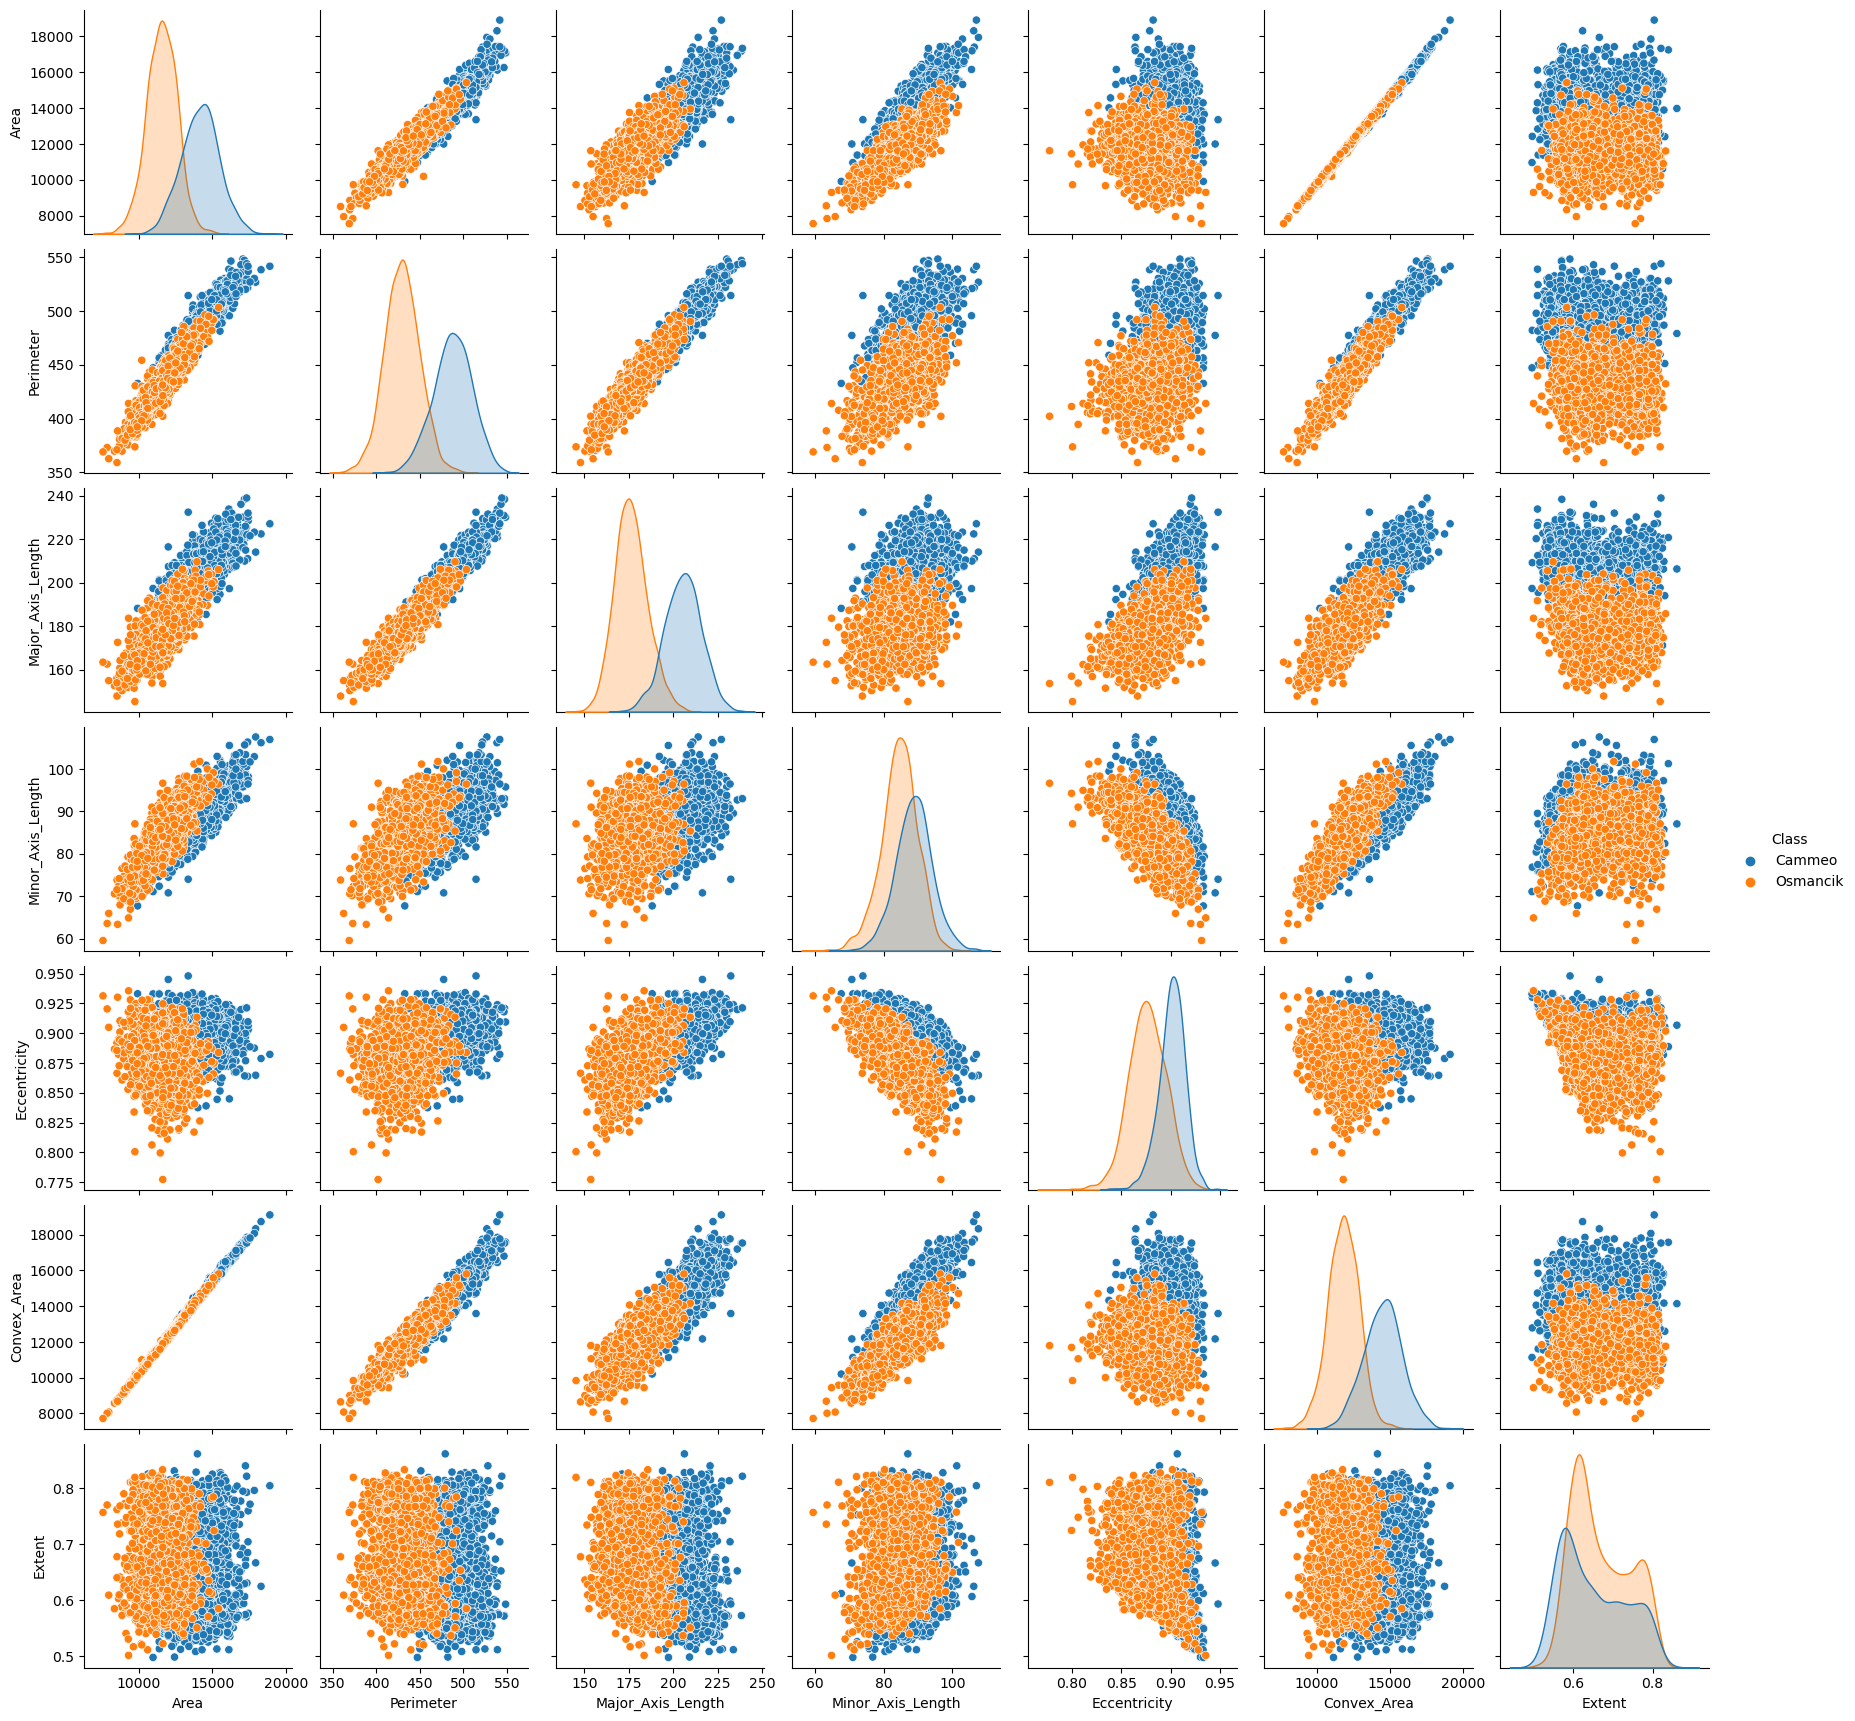

In [15]:
sns.pairplot(df, hue='Class')

# Feature Selection

In [16]:
skf = SelectKBest(k=3, score_func=chi2)

In [17]:
skf.fit(x, y)

SelectKBest(k=3, score_func=<function chi2 at 0x000001C481EF7520>)

In [18]:
x_new = x.iloc[:,skf.get_support()]
x_new

,Area,Perimeter,Convex_Area
0,15231,525.578979,15617
1,14656,494.311005,15072
2,14634,501.122009,14954
3,13176,458.342987,13368
4,14688,507.166992,15262
...,...,...,...
3805,11441,415.858002,11628
3806,11625,421.390015,11904
3807,12437,442.498993,12645
3808,9882,392.296997,10097


# Feature Scaling

In [19]:
scaler = MinMaxScaler()

In [20]:
x_scaled = scaler.fit_transform(x_new)

In [21]:
pd.DataFrame(x_scaled).describe()

,0,1,2
count,3810.000000,3810.000000,3810.000000
mean,0.450337,0.502462,0.459696
std,0.152470,0.188000,0.156204
min,0.000000,0.000000,0.000000
25%,0.336164,0.354086,0.343113
50%,0.428666,0.474013,0.438071
75%,0.563193,0.657969,0.576741
max,1.000000,1.000000,1.000000


# Cross Validation

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)

In [23]:
x_train.shape

(2857, 3)

In [24]:
x_test.shape

(953, 3)

# Build the model

# Decision Tree Model

In [25]:
dt = DecisionTreeClassifier(random_state=0)

In [26]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
y_pred = dt.predict(x_test)

In [28]:
y_pred;

Performance Evaluation

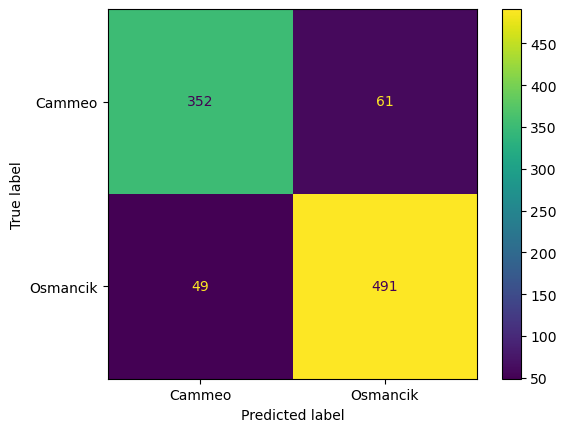

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [30]:
accuracy_score(y_test, y_pred)

0.8845750262329486

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Cammeo       0.88      0.85      0.86       413
    Osmancik       0.89      0.91      0.90       540

    accuracy                           0.88       953
   macro avg       0.88      0.88      0.88       953
weighted avg       0.88      0.88      0.88       953



# K-Nearest Neighbors Model

In [32]:
classifier = KNeighborsClassifier(n_neighbors=26)

In [33]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=26)

In [34]:
y_pred = classifier.predict(x_test)

In [35]:
y_pred;

Performannce Evaluation

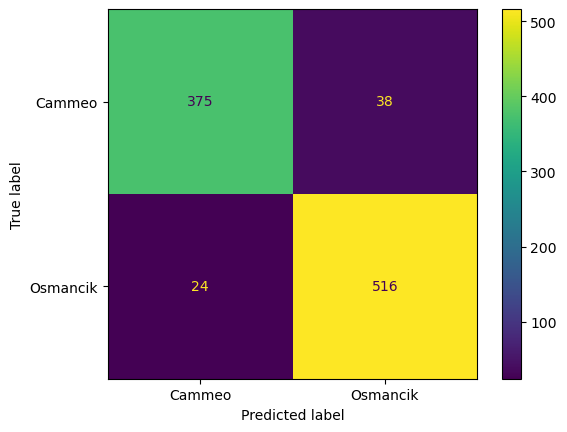

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [37]:
accuracy_score(y_test, y_pred)

0.9349422875131165

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.94      0.91      0.92       413
    Osmancik       0.93      0.96      0.94       540

    accuracy                           0.93       953
   macro avg       0.94      0.93      0.93       953
weighted avg       0.94      0.93      0.93       953



# Logistic Regression Model

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(x_train, y_train)

LogisticRegression()

In [41]:
y_pred = lr.predict(x_test)
y_pred;

### Performance Evaluation

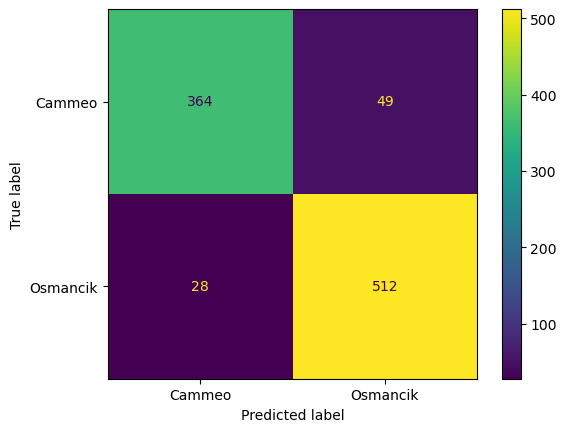

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [43]:
accuracy_score(y_test, y_pred)

0.919202518363064

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.93      0.88      0.90       413
    Osmancik       0.91      0.95      0.93       540

    accuracy                           0.92       953
   macro avg       0.92      0.91      0.92       953
weighted avg       0.92      0.92      0.92       953



# Random Forest Classifier Model

In [45]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [46]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = rf_classifier.predict(x_test)

In [48]:
y_pred;

### Performance Evaluation

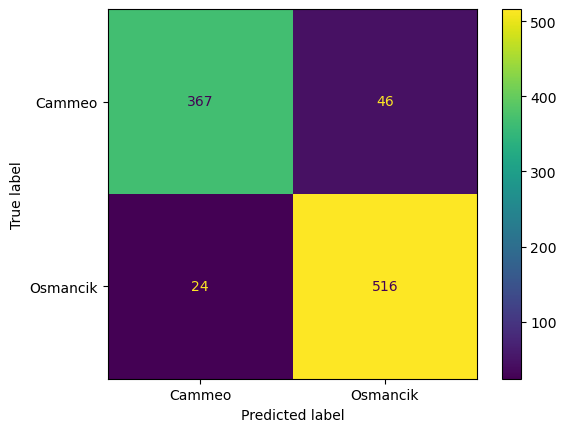

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [50]:
accuracy_score(y_test, y_pred)

0.9265477439664218

# Deploy the Model

In [51]:
joblib.dump(classifier, 'classifier.model')

['classifier.model']

In [52]:
joblib.dump(scaler,'scaler.model')

['scaler.model']

In [53]:
x_new.columns

Index(['Area', 'Perimeter', 'Convex_Area'], dtype='object')